In [ ]:
%load_ext autoreload
%autoreload 2

# Load data

In [1]:
import numpy as np
import pandas as pd
import torch

import os
import sys
# Add the absolute path of the directory where ChemSelML is located to the python package search path
sys.path.append("/PyScripts/PyTorch.dir/Radical")

from ChemSelML.bin.ChemSelectivityDataset import ReactionDataset, SelectivityDataset

# '/PyScripts/PyTorch.dir/Radical/DataSet' corresponds to the "../DataSet" directory in this project.
# mode corresponds to the folder name in "../DataSet/raw"
ArR_dataset = ReactionDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev')
print(ArR_dataset,'\n')
print(ArR_dataset.data,'\n')

ArR_DDG_dataset = SelectivityDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev')
print(ArR_DDG_dataset,'\n')
print(ArR_DDG_dataset.data,'\n')

ReactionDataset(3605) 

Data(ArR_idx=[3605], Ar_ACSF=[41477, 23], Ar_ACSF_local=[3605, 16], Ar_BoB=[3605, 291], Ar_CM=[79310, 22], Ar_MACCSfp=[3605, 167], Ar_Morganfp=[3605, 512], Ar_PhyChem_local=[3605, 13], Ar_PhyChem_total=[3605, 10], Ar_SOAP=[3605, 5292], Ar_edge_attr=[451446, 11], Ar_edge_index=[2, 451446], Ar_mergefp=[3605, 679], Ar_pos=[41477, 3], Ar_x=[41477, 38], R_ACSF=[28015, 23], R_ACSF_local=[3605, 16], R_BoB=[3605, 122], R_CM=[79310, 22], R_MACCSfp=[3605, 167], R_Morganfp=[3605, 512], R_PhyChem_local=[3605, 9], R_PhyChem_total=[3605, 5], R_SOAP=[3605, 5292], R_edge_attr=[223276, 11], R_edge_index=[2, 223276], R_mergefp=[3605, 679], R_pos=[28015, 3], R_x=[28015, 38], y=[3605]) 

SelectivityDataset(5306) 

Data(ArR_sel_idx=[5306], Ar_ACSF=[62492, 23], Ar_ACSF_local@A=[5306, 16], Ar_ACSF_local@B=[5306, 16], Ar_BoB=[5306, 291], Ar_CM=[116732, 22], Ar_MACCSfp=[5306, 167], Ar_Morganfp=[5306, 512], Ar_PhyChem_local@A=[5306, 13], Ar_PhyChem_local@B=[5306, 13], Ar_PhyChem_total=[5

# Benchmark

In [117]:
import os
import sys
# Add the absolute path of the directory where ChemSelML is located to the python package search path
sys.path.append("/PyScripts/PyTorch.dir/Radical")

from ChemSelML.train.training import FSet
from ChemSelML.train.benchmark import Benchmark
import warnings

In [75]:
'''
feat_alias: string or list of string, string should contains only the following letters: 
                    'F', 'B', 'P', 's', 's', 'p'. Its meaning is：
                    {'F': 'mergefp', 'B': 'BoB', 'P': 'PhyChem_total', 
                     's': 'SOAP', 'a': 'ACSF_local', 'p': 'PhyChem_local'}
'''

model_names = []
feat_alias = ['Fs', 'Fa', 'Bs', 'Ba', 'Pp', 's', 'a', 'p']

In [76]:
BMK = Benchmark(mode='DDG_R', model_names=model_names, feat_alias=feat_alias, 
                n_jobs=14, feat_parallel=True, model_parallel=True)

In [77]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    reg_res_df, y_pred_history, FSet, cv_result_history = BMK.CV_fit(ArR_DDG_dataset.data) 
    

1 2020.01.02 06:58:55 ('ACSF_local',) complete!
    Time cost: 6240.0798s
8 2020.01.02 07:04:36 ('mergefp', 'ACSF_local') complete!
    Time cost: 6581.0317s
2 2020.01.02 07:07:16 ('PhyChem_local',) complete!
    Time cost: 6741.9121s
23 2020.01.02 07:07:20 ('PhyChem_total', 'PhyChem_local') complete!
    Time cost: 6745.3156s
15 2020.01.02 07:12:16 ('BoB', 'ACSF_local') complete!
    Time cost: 7041.4107s
0 2020.01.02 07:43:39 ('SOAP',) complete!
    Time cost: 8924.6605s
14 2020.01.02 07:44:34 ('BoB', 'SOAP') complete!
    Time cost: 8979.1387s
7 2020.01.02 07:44:59 ('mergefp', 'SOAP') complete!
    Time cost: 9004.9669s


In [118]:
BMK.processed_dir = ArR_DDG_dataset.processed_dir
BMK.suffix = 'reg_DDG'
BMK.save_to_pkl(y_pred_history, filename='y_pred_history')
BMK.save_to_pkl(FSet, filename='FSet')
BMK.save_to_pkl(cv_result_history, filename='cv_result_history')


/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/y_pred_history_reg_DDG_20200102_051446.pkl
/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/FSet_reg_DDG_20200102_051446.pkl
/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/cv_result_history_reg_DDG_20200102_051446.pkl


In [ ]:
BMK.save_to_pkl(BMK, filename='BMK')

In [ ]:
reg_res_df

In [271]:
import pandas as pd
import time

Timestamp = time.strftime('%Y%m%d_%H%M%S', time.localtime(time.time()))

reg_res_df.to_csv(r'%s/ArR_DDG_benchmark_summary_reg_result_%s.csv'%(ArR_DDG_dataset.processed_dir,Timestamp))
reg_res_df[reg_res_df['R2']>0]

,Feat_idx,Feat_alias,Model,MAE,MSE,R2,F1_micro_5c,F1_micro_3c
700,7,Fs,XGB_R,0.4913,0.4444,0.9677,0.8304,0.9109
715,7,Fs,NN_R,0.4911,0.4477,0.9674,0.8210,0.9031
1400,14,Bs,XGB_R,0.5031,0.4625,0.9664,0.8334,0.9112
0,0,s,XGB_R,0.5027,0.4628,0.9663,0.8326,0.9133
1,0,s,RF_R,0.5049,0.5002,0.9636,0.8274,0.9043
701,7,Fs,RF_R,0.5051,0.5002,0.9636,0.8285,0.9052
1401,14,Bs,RF_R,0.5041,0.4998,0.9636,0.8276,0.9052
2301,23,Pp,RF_R,0.5062,0.5057,0.9632,0.8308,0.9093
15,0,s,NN_R,0.5426,0.5334,0.9612,0.8057,0.8941
1415,14,Bs,NN_R,0.5843,0.6175,0.9551,0.7966,0.8903


In [111]:
#importlib.reload(sys.modules['ChemSelML.train.utils'])
from ChemSelML.train.utils import df_2heatmap

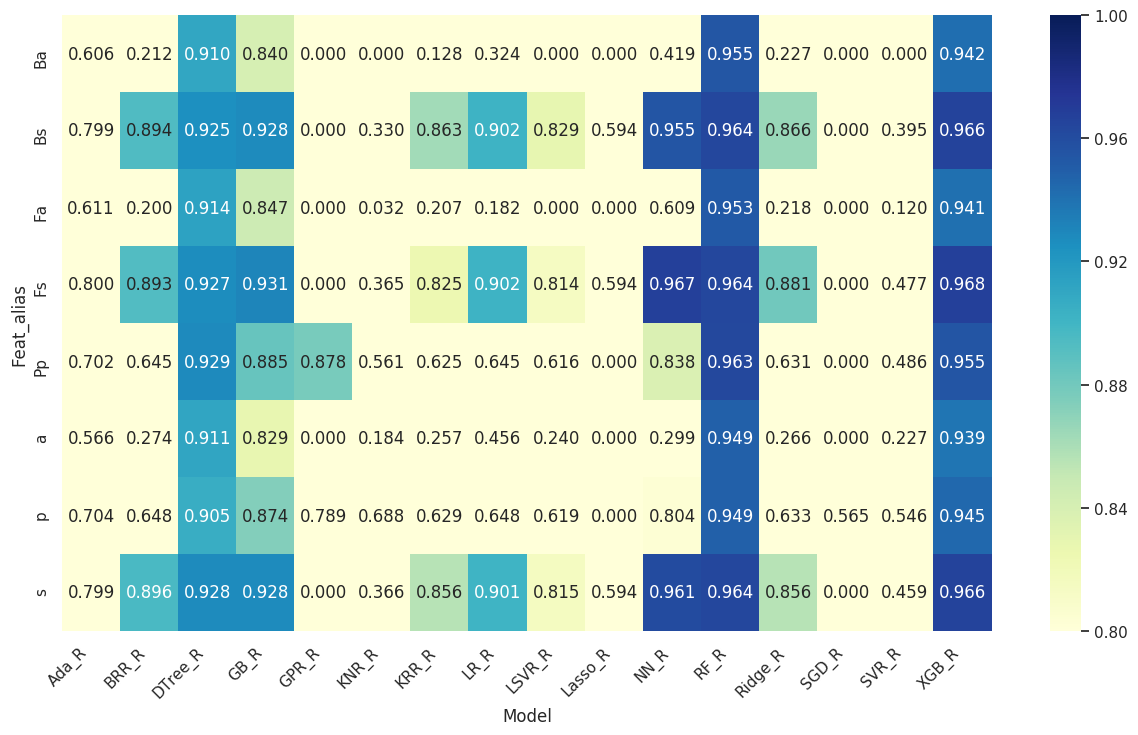

In [113]:
gb_data = reg_res_df[reg_res_df['R2']>0].groupby(by=[
            'Feat_alias', 'Model'])['R2'].mean().unstack()
gb_data.replace(np.nan, 0, inplace=True)
df_2heatmap(gb_data)

In [272]:
df = reg_res_df.copy()
df['Global'] = df['Feat_alias'].apply(lambda x: FSet.alias_dict_inverse[x[0]] if len(x)==2 else '--')
df['Local'] = df['Feat_alias'].apply(lambda x: FSet.alias_dict_inverse[x[-1]])
df['Model'] = df['Model'].apply(lambda x: x[:-2])
df['sel'] = df['Model'].apply(lambda x: 0 if x in ['SGD'] else 1) 
df

,Feat_idx,Feat_alias,Model,MAE,MSE,R2,F1_micro_5c,F1_micro_3c,Global,Local,sel
700,7,Fs,XGB,4.913000e-01,4.444000e-01,9.677000e-01,0.8304,0.9109,mergefp,SOAP,1
715,7,Fs,NN,4.911000e-01,4.477000e-01,9.674000e-01,0.8210,0.9031,mergefp,SOAP,1
1400,14,Bs,XGB,5.031000e-01,4.625000e-01,9.664000e-01,0.8334,0.9112,BoB,SOAP,1
0,0,s,XGB,5.027000e-01,4.628000e-01,9.663000e-01,0.8326,0.9133,--,SOAP,1
1,0,s,RF,5.049000e-01,5.002000e-01,9.636000e-01,0.8274,0.9043,--,SOAP,1
701,7,Fs,RF,5.051000e-01,5.002000e-01,9.636000e-01,0.8285,0.9052,mergefp,SOAP,1
1401,14,Bs,RF,5.041000e-01,4.998000e-01,9.636000e-01,0.8276,0.9052,BoB,SOAP,1
2301,23,Pp,RF,5.062000e-01,5.057000e-01,9.632000e-01,0.8308,0.9093,PhyChem_total,PhyChem_local,1
15,0,s,NN,5.426000e-01,5.334000e-01,9.612000e-01,0.8057,0.8941,--,SOAP,1
1415,14,Bs,NN,5.843000e-01,6.175000e-01,9.551000e-01,0.7966,0.8903,BoB,SOAP,1


In [273]:
gb_data2 = df[(df['R2']>0) & (df['sel']==1)].groupby(by=[
            'Local', 'Global', 'Model'])['R2'].mean().unstack()
gb_data2.replace(np.nan, 0, inplace=True)
colors_ = sns.color_palette("YlGnBu",135).as_hex()[:90]+sns.color_palette("YlGnBu",30).as_hex()[-10:]
color_map = ListedColormap(colors_) #as_cmap=True)
aaa = gb_data2.style.background_gradient(cmap=color_map, axis=None, low=0.0, high=0.03, text_color_threshold=0.408)
aaa.format("{:.3f}")
aaa

In [486]:
aaa.to_excel('./DataSet/processed/Benchmark_pkl/styled2.xlsx', engine='openpyxl')

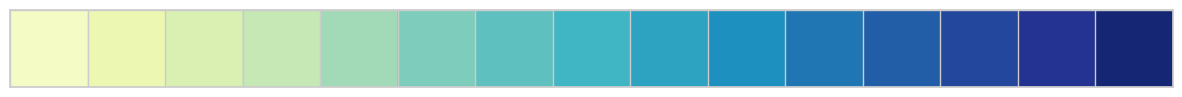

In [217]:
sns.palplot(sns.color_palette("YlGnBu",15))

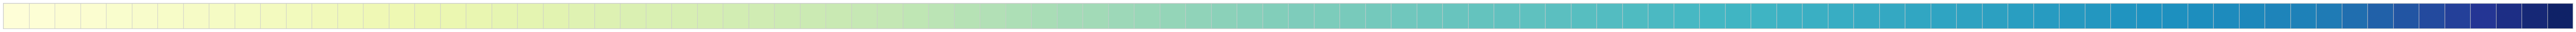

In [257]:
sns.palplot(sns.color_palette("YlGnBu",135)[:90]+sns.color_palette("YlGnBu",30)[-10:])